In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function and its gradient
def f(x):
    return x**2 - 4*x + 4

def grad_f(x):
    return 2*x - 4

# Gradient Descent Algorithm
def gradient_descent(learning_rate, initial_x, max_iter):
    x = initial_x
    history = [x]
    for _ in range(max_iter):
        x = x - learning_rate * grad_f(x)
        history.append(x)
    return np.array(history)

# Stochastic Gradient Descent (SGD) Algorithm
def sgd(learning_rate, initial_x, max_iter):
    x = initial_x
    history = [x]
    for _ in range(max_iter):
        x = x - learning_rate * grad_f(x)  # SGD with batch size 1 (same as GD here)
        history.append(x)
    return np.array(history)

# Adam Optimization Algorithm
def adam(learning_rate, initial_x, max_iter, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = initial_x
    m = 0
    v = 0
    t = 0
    history = [x]
    
    for _ in range(max_iter):
        t += 1
        grad = grad_f(x)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x = x - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        history.append(x)
        
    return np.array(history)

# Newton's Method Algorithm
def newtons_method(initial_x, max_iter):
    x = initial_x
    history = [x]
    
    for _ in range(max_iter):
        grad = grad_f(x)
        hessian = 2  # The second derivative of f(x) is 2
        x = x - grad / hessian
        history.append(x)
        
    return np.array(history)



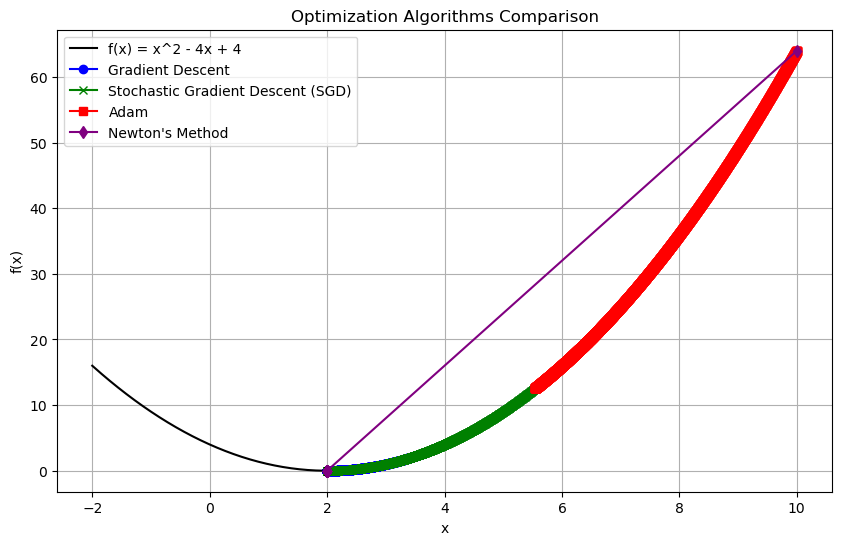

Final value using Gradient Descent: 2.0003595807416623
Final value using SGD: 2.0003595807416623
Final value using Adam: 5.541240228416191
Final value using Newton's Method: 2.0


In [4]:

# Hyperparameters
learning_rate = 0.001
initial_x = 10  # Starting point
max_iter = 5000

# Run the optimization algorithms
gd_history = gradient_descent(learning_rate, initial_x, max_iter)
sgd_history = sgd(learning_rate, initial_x, max_iter)
adam_history = adam(learning_rate, initial_x, max_iter)
newton_history = newtons_method(initial_x, max_iter)

# Plot the results
x_vals = np.linspace(-2, 6, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))

# Plot the quadratic function
plt.plot(x_vals, y_vals, label="f(x) = x^2 - 4x + 4", color='black')

# Plot the optimization algorithms
plt.plot(gd_history, f(gd_history), label="Gradient Descent", marker='o', color='blue')
plt.plot(sgd_history, f(sgd_history), label="Stochastic Gradient Descent (SGD)", marker='x', color='green')
plt.plot(adam_history, f(adam_history), label="Adam", marker='s', color='red')
plt.plot(newton_history, f(newton_history), label="Newton's Method", marker='d', color='purple')

# Customize the plot
plt.title("Optimization Algorithms Comparison")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print final values for each method
print(f"Final value using Gradient Descent: {gd_history[-1]}")
print(f"Final value using SGD: {sgd_history[-1]}")
print(f"Final value using Adam: {adam_history[-1]}")
print(f"Final value using Newton's Method: {newton_history[-1]}")